## Introduction

Exploration of the gene expression dataset obtained by RNA sequencing of the three replicates for *E. coli* now averaged for the stationary phase, growth media phase, and growth media with ampicillin treatment. Here I will perform exploratory data analysis to visualize the dataset, determine if additional data cleaning is required before analysis, and decide the best route for data analysis in Task 5. Ultimately I want to address my research question: what genes are upregulated or downregulated when *E. coli* is treated with ampicillin compared to the control?
***

In [ ]:
# Milestone 3: Resolved structure issues by adding additional information to the introduction/conclusion section in the exploratory file and added an introduction/conclusion file.
# Milestone 3: Resolved structue issues  by making headers and steps more clear. 
# Milestone 3: Ensured research question was clearly mentioned in the introduction/conclusion. 

## Exploratory Data Analysis

**Step 1:** Bring in the clean data from Task 3, the project fucntions file, to explore.

In [5]:
import pandas as pd
import os

os.chdir('C:/Users/eilee/course-project-solo_115/analysis/scripts')

import project_functions
data = pd.read_excel(r'data/raw/data.xlsx')
df = project_functions.load_and_process(data)
df

# Milestone 3: Corrected the issue of retriving data from scripts it is now being retrived from data/raw. 

,Gene Name,Gene Symbol,Avg. Stationary Phase,Avg. Growth in Media,Avg. Media and Ampicillin
0,Km CDS,Km,10034.666667,753163.000000,4.010489e+06
1,cfp CDS,cfp,4188.000000,149442.333333,1.227688e+06
1403,katG CDS,katG,391.666667,338160.833333,6.855638e+05
1896,ompA CDS,ompA,525.666667,170523.166667,3.269718e+05
69,ahpF CDS,ahpF,182.333333,194604.833333,2.945845e+05
...,...,...,...,...,...
4061,ykgV CDS,ykgV,0.000000,0.000000,0.000000e+00
4071,ylcG CDS,ylcG,0.000000,0.000000,0.000000e+00
4072,ylcH CDS,ylcH,0.000000,0.000000,0.000000e+00
3588,yffL CDS,yffL,0.000000,0.000000,0.000000e+00


## Dataset

This dataset contains the averaged gene expression levels in *E coli* measured using RNA sequencing under three conditions - stationary phase (column 3), growth media (column 4), and growth media with ampicillin treatment (column 5). The name of the gene sequence is in column 1 and its symbol is in column 2. Rows represent measured RNA sequencing values otherwise known as the gene expression level. 
***

In [ ]:
# Milestone 3: Added dataset section and explained the data. 

**Step 2:** Proceeding with the exploratory analysis starting with checking gneral information such as rows, columns, statistics, etc. to get a well rounded look at the dataset. 

In [6]:
len(df. columns) # number of columns
len(df.index) # number or rows

df.info() 
df.describe() #stats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4359 entries, 0 to 2996
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gene Name                  4359 non-null   object 
 1   Gene Symbol                4359 non-null   object 
 2   Avg. Stationary Phase      4359 non-null   float64
 3   Avg. Growth in Media       4359 non-null   float64
 4   Avg. Media and Ampicillin  4359 non-null   float64
dtypes: float64(3), object(2)
memory usage: 204.3+ KB


,Avg. Stationary Phase,Avg. Growth in Media,Avg. Media and Ampicillin
count,4359.000000,4359.000000,4.359000e+03
mean,23.307714,3193.121513,5.759521e+03
std,183.156575,15537.988270,6.603072e+04
min,0.000000,0.000000,0.000000e+00
25%,3.666667,512.833333,4.785833e+02
50%,7.500000,1065.833333,1.106500e+03
75%,14.833333,2070.583333,2.768667e+03
max,10034.666667,753163.000000,4.010489e+06


**Description**

Here we see that there are 4359 gene expression values over the three treatment conditions in *E. coli*. Additionally, the small mean of 23.31 expression level during the stationary phase indicates that there is likely little gene expression occurring at this time. This makes sense as the cells are not growing or increasing in number during this phase. The mean is much higher in the growth media phase at 3193.12 expression level as the cells increase in number. But even higher still is during the ampicillin treatment at 5.76x10^3 expression level as *E. coli* must now defend itself against the antibiotic.  
***

**Step 3:** visualizing the data with a histogram to look at distribution and determine if the data is skewed and requires further processing before data analysis. 

array([[<AxesSubplot:title={'center':'Avg. Stationary Phase'}>,
        <AxesSubplot:title={'center':'Avg. Growth in Media'}>],
       [<AxesSubplot:title={'center':'Avg. Media and Ampicillin'}>,
        <AxesSubplot:>]], dtype=object)

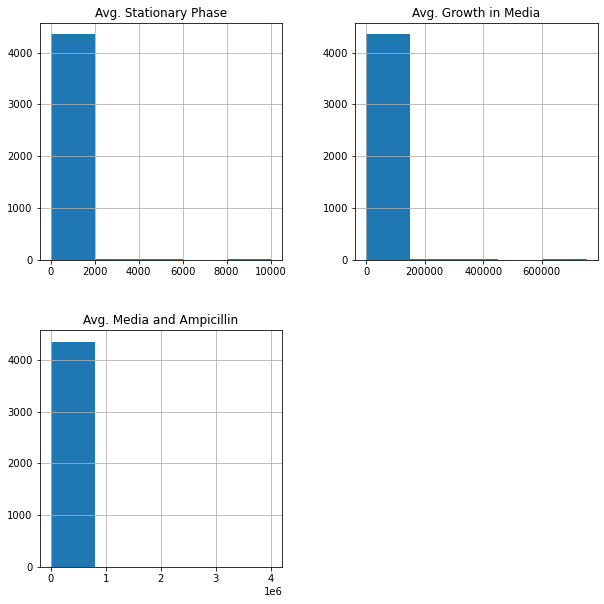

In [7]:
hist = df.hist(bins=5,figsize =(10,10))
hist

**Description**
1. Looks each histogram/situation is skewed right for each condition. Further data processing is required before Task 5.
2. Solution: I should transform the data before the analysis in Task 5, I am thinking with log. 
3. I also need to filter out low or zero expressed genes before move onto data analysis.

**Step 4:** I am curious to see the relationships across the entire data frames so I will try out a pair plot.

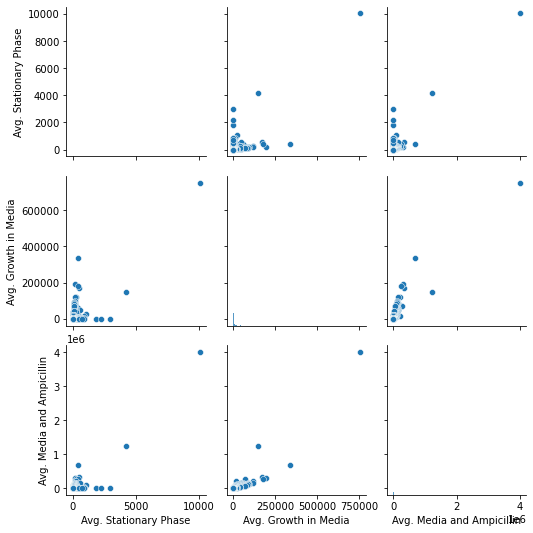

In [8]:
import seaborn as sns

sns.pairplot(df)

**Description**
1. Looks like there are some outliers that will need to be taken care of prior to further data analysis (note above). Perhaps this will be helped using log transformation.m
2. Looks like there is no relation between stationary phase gene expression and media with ampicillin gene expression? Could be due to nontransformed data.
3. Most data points reside near the origin. 

**Step 5:** Checking the coreelation 

<AxesSubplot:>

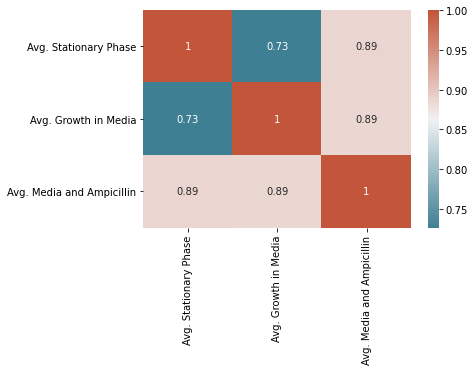

In [9]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

1. The correlation looks great with the values all equaling or nearing one!

**Conclusion** 

Now I am ready to tackle data analysis with an idea of how to prepare the data for visualization in order to determine which genes are upregulated during ampicillin treatment in *E. coli*. 
But first I will need to remove the lowly expressed genes and log transform the data which I discovered by perfroming this EDA. 